# Newton's Method

In [178]:
import numpy as np
from matplotlib import pyplot as plt
import random as rand

## Exercise 1

In [128]:
def newtons(f, fprime, x_0, tol = 10e-5, maxiter = 15):
    '''
    This function finds a root using Newton's method. The inputs are
    f the function to find the root of
    fprime the derivative of f
    x_0 the inital guess
    tol the tolerance
    maxiter the max number of iterations
    '''
    dist = 1000
    count = 0
    x_t = x_0
    converge = True
    while (dist > tol) & (count < maxiter):
        x_tp1 = x_t - f(x_t)/fprime(x_t)
        dist = np.abs(x_tp1 - x_t)
        x_t = x_tp1
        count += 1
    if count == maxiter:
        converge = False
    return x_t, converge, count

In [129]:
#Test
f = lambda x: np.exp(x) - 2
fprime = lambda x: np.exp(x)

newtons(f, fprime, 10)

(0.6931471805599453, True, 14)

Looks good

## Exercise 2

In [130]:
def ex2func(N1, N2, P1, P2, x_0, tol = 10e-5, maxiter = 15):
    '''
    Function solves for the appropriate r in the equation from the 
    ACME tutorial. Inputs are as specified there and some arguments 
    to pass into newtons.
    
    Function calls newtons.
    '''
    f = lambda r: P1 * ( (1 + r) ** N1 - 1 ) - P2 * (1 - (1 + r) ** -N2 )
    fprime = lambda r: P1 * N1 * (1+r) ** (N1-1) + P2 * N2 * (1+r) ** (-N2-1)
    results = newtons(f, fprime, 10, tol = tol, maxiter = maxiter)
    return results

In [131]:
ex2func(30, 20, 2000, 8000, .1, maxiter = 100)

(0.038861786384895465, True, 79)

Excellent

## Exercise 3

In [136]:
def newtons3(f, fprime, x_0, tol = 10e-5, maxiter = 15, alpha=1):
    '''
    Modifies newtons to accept a backtracking parameter
    '''
    dist = 1000
    count = 0
    x_t = x_0
    converge = True
    while (dist > tol) & (count < maxiter):
        x_tp1 = x_t - alpha * f(x_t)/fprime(x_t)
        dist = np.abs(x_tp1 - x_t)
        x_t = x_tp1
        count += 1
    if count == maxiter:
        converge = False
    return x_t, converge, count

In [145]:
#Test
f3 = lambda x: np.sign(x) * np.power(np.abs(x), 1/3)
fprime3 = lambda x: (1/3) * np.power(np.abs(x), -2/3)
newtons3(f3, fprime3, .01, alpha = .4, maxiter = 100)

(1.6000000000000186e-05, True, 4)

Good

## Exercise 4

In [138]:
def ex4func(f, fprime, x_0, tol = 10e-5, maxiter = 15, lb = 0, ub = 1, fineness = 100):
    '''
    Function uses newtons3 to plot a graph of the number of iterations needed
    for convergence for different alphas. New arguments are:
    lb a lower bound
    ub an upper bound
    fineness the number of alphas used
    '''
    alphagrid = np.linspace(lb, ub)
    itergrid = np.zeros_like(alphagrid)
    for i in range(len(alphagrid)):
        itergrid[i] = newtons3(f, fprime, x_0, alpha = alphagrid[i], tol = tol, maxiter = maxiter)[2]
    plt.plot(alphagrid, itergrid)
    plt.xlabel('Alpha')
    plt.ylabel(f'Number of iterations needed (maxiter = {maxiter})')
    plt.title('Number of Iterations Needed for each Alpha')

We see that the func from ex 3 converges for alpha < about .65, so that's the bound for the plot.

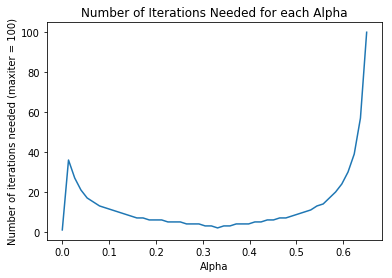

In [139]:
ex4func(f3, fprime3, .01, fineness = 1000, lb = 0, ub = .65, maxiter = 100)

## Exercise 5

In [158]:
def newtons5(f, Df, x_0, tol = 10e-5, maxiter = 15, alpha=1):
    '''
    Modifies newtons3 to accept vectors.
    f should be a row vector (1 by n)
    Df should be a matrix (n by n)
    x_0 shouls be an np array with n elements
    '''
    dist = 1000
    count = 0
    x_t = x_0
    converge = True
    if np.isscalar(x_0):
        while (dist > tol) & (count < maxiter):
            x_tp1 = x_t - alpha * f(x_t)/Df(x_t)
            dist = np.abs(x_tp1 - x_t)
            x_t = x_tp1
            count += 1
    else:
        x_tp1 = x_t - alpha * np.linalg.inv(Df(x_t)) @ f(x_t)
        dist = np.linalg.norm(x_tp1 - x_t)
        x_t = x_tp1
    if count == maxiter:
        converge = False
    return x_t, converge, count

In [172]:
#Test
print('Looks good for 1 dimensional:', newtons5(f3, fprime3, .01, alpha = .4, maxiter = 100))
f5 = lambda x: np.array([x[0]**3, x[0] - x[1]])
Df5 = lambda x: np.array([[3 * x[0]**2, 0], [1, -1]])
print('\nAnd for multidimensional:', newtons5(f5, Df5, [.01, 1]), "f =", f(newtons5(f, Df, [.01, 1])[0]))

Looks good for 1 dimensional: (1.6000000000000186e-05, True, 4)

And for multidimensional: (array([0.00666667, 0.00666667]), True, 0) f = [ 2.96296296e-07 -4.33680869e-17]


## Exercise 6 (ERRORS)

In [242]:
def x_0search(f, Df, region, tol = 10e-5, maxiter = 50, alpha=1, maxsearch = 50):
    '''
    Function searches a given region for an x_0 at which Newton's method
    converges for the function f.
    
    I decided to randomly sample from the region - maybe there is a
    "smarter" way to do this!
    
    Region is inputted as an n by 2 array.
    '''
    for i in range(maxsearch):
        x_0 = rand.uniform(region[:,0], region[:,1])
        results = newtons5(f, Df, [.01, 1])
        if results[1]:
            break
    if i == maxsearch - 1:
        return "No x_0 was found"
    else:
        return x_0, i

In [243]:
#Deine functions f6, Df6
f6 = lambda x: np.array([5*x[0]*x[1] - x[0]*(1+x[1]), \
                         -x[0]*x[1] + (1-x[1])*(1+x[1])])
Df6 = lambda x: np.array([ [5*x[1]-(1+x[1]), 5*x[0]-x[0] ],
                         [ -x[1], -x[0] + 2*x[1] ] ])

x0 = x_0search(f6, Df6, region)
print(Df6([1, 1]))
print("Good enough x_0:", x0)
print("Newton at x_0:", newtons5(f6, Df6, x0))

[[ 3  4]
 [-1  1]]
Good enough x_0: (array([-367.57101319,  632.42898681]), 0)


ValueError: setting an array element with a sequence.

## Exercise 7

Thanks to Reiko for a good bit of this code

In [284]:
def ex7func(f, fprime, zeros, rmin, rmax, imin, imax, res, iters=10):
    '''
    Function computes and plots the basins of attraction over a complex
    region.
    Inputs:
    f a complex valued function
    fprime the function's derivative
    zeros a matrix of the function's zeros
    rmin, rmax, imin, imax: domain of region
    res the resolution
    iters number of iterations
    '''
    #Initialize grid
    rgrid = np.linspace(rmin, rmax, res)
    igrid = np.linspace(imin, imax, res)
    Xreal, Ximag = np.meshgrid(rgrid, igrid)
    X_0 = Xreal + Ximag*1j
    
    #Run Newton Method on X_0 iters times (no check for convergence).
    X_t = X_0
    for i in range(iters):
        X_t = X_t - f(X_t) / fprime(X_t)
        i += 1
    
    #Create Y matrix to figure which root to use in plot
    Y = np.zeros_like(X_t, dtype = int)
    for i in range(res):
        for j in range(res):
            Y[i, j] = np.argmin(np.abs(zeros - X_t[i,j]))
    
    plt.pcolormesh(Xreal, Ximag, Y, cmap='infe')
    plt.show()

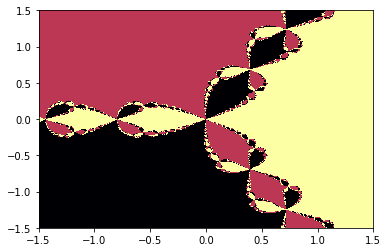

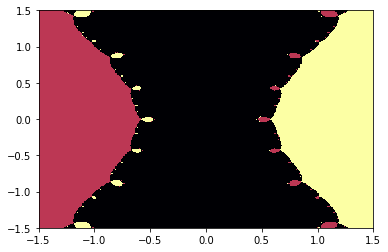

In [285]:
f7a = lambda x: x**3 - 1
f7b = lambda x: x**3 - x
fp7a = lambda x: 3*x**2
fp7b = lambda x: 3*x**2 - 1
f7zerosa = [-1/2 - np.sqrt(3) / 2 * 1j, -1/2 + np.sqrt(3) / 2 * 1j, 1]
f7zerosb = [0, -1, 1]
ex7func(f7a, fp7a, f7zerosa, -1.5, 1.5, -1.5, 1.5, 500, 50)
ex7func(f7b, fp7b, f7zerosb, -1.5, 1.5, -1.5, 1.5, 500, 50)